In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#数据导入
earthquake = pd.read_csv(r'Seaborn/earthquake.csv')

In [5]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [8]:
earthquake['date_parsed'] = pd.to_datetime(earthquake['Date'], format = "%m/%d/%Y", errors='coerce')

In [9]:
earthquake['date_parsed']

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: date_parsed, Length: 23412, dtype: datetime64[ns]

In [10]:
earthquake['date_parsed'].loc[earthquake['date_parsed'].isnull()]

3378    NaT
7512    NaT
20650   NaT
Name: date_parsed, dtype: datetime64[ns]

In [11]:
earthquake['Date'].loc[[3378,7512,20650]]

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [12]:
earthquake['Date'][3378] = '02/23/1975'
earthquake['Date'][7512] = '04/28/1985'
earthquake['Date'][20650] = '03/13/2011'

In [13]:
earthquake['date_parsed'] = pd.to_datetime(earthquake['Date'], format = "%m/%d/%Y", errors='coerce')
earthquake['date_parsed']

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: date_parsed, Length: 23412, dtype: datetime64[ns]

添加年份和月份两列

In [14]:
earthquake['Year'] = earthquake['date_parsed'].dt.year

In [15]:
earthquake['Month'] = earthquake['date_parsed'].dt.month

In [16]:
earthquake['Year']

0        1965
1        1965
2        1965
3        1965
4        1965
         ... 
23407    2016
23408    2016
23409    2016
23410    2016
23411    2016
Name: Year, Length: 23412, dtype: int64

筛选出type为Earthquake的数据

In [17]:
earthquake = earthquake[earthquake['Type'] == 'Earthquake']

In [18]:
earthquake.Type.unique()

array(['Earthquake'], dtype=object)

In [19]:
earthquake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed,Year,Month
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02,1965,1
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04,1965,1
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05,1965,1
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08,1965,1
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09,1965,1


用countplot绘制条形图
> sns.countplot(earthquake['Year'])

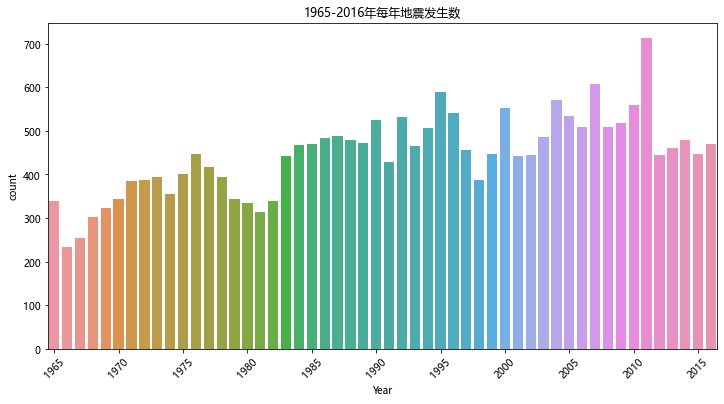

In [20]:
# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']# 设置微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False # 避免坐标轴不能正常的显示负号

plt.figure(1,figsize=(12,6))
Year = [i for i in range(1965,2017,5)]
idx = [i for i in range(0,52,5)]
sns.countplot(earthquake['Year'])
plt.setp(plt.xticks(idx,Year)[1],rotation=45)
plt.title('1965-2016年每年地震发生数')
plt.show()

### 作热力图heatmap去看看近十年来的地震记录  
按年份和月份列进行分组，取出年份、月份及ID列；  
删选出近十年的数据；  
将年份、月份及ID列做成数据透视表；  
将近十年来的地震记录数按照年份和月份做热力图   
设置一个标题：'近10年地震发生次数'  

In [21]:
earthquake

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed,Year,Month
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02,1965,1
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04,1965,1
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05,1965,1
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08,1965,1
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28,2016,12
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28,2016,12
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28,2016,12
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29,2016,12


In [22]:
# 按年份和月份列进行分组
MY_data = earthquake.groupby([earthquake['Year'],earthquake['Month']],as_index=False).count()
# 取出年份、月份及ID列
test = MY_data[['Year','Month','ID']]

In [23]:
MY_data

,Year,Month,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,1965,1,13,13,13,13,13,13,0,0,...,0,0,0,0,13,13,13,13,13,13
1,1965,2,54,54,54,54,54,54,0,0,...,0,0,0,0,54,54,54,54,54,54
2,1965,3,38,38,38,38,38,38,0,0,...,0,0,0,0,38,38,38,38,38,38
3,1965,4,33,33,33,33,33,33,0,0,...,0,0,0,0,33,33,33,33,33,33
4,1965,5,22,22,22,22,22,22,0,0,...,0,0,0,0,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2016,8,35,35,35,35,35,35,35,0,...,35,35,35,35,35,35,35,35,35,35
620,2016,9,46,46,46,46,46,46,46,1,...,46,45,46,46,46,46,46,46,46,46
621,2016,10,36,36,36,36,36,36,36,0,...,36,36,36,36,36,36,36,36,36,36
622,2016,11,44,44,44,44,44,44,44,0,...,44,44,44,44,44,44,44,44,44,44


In [ ]:
test

In [ ]:
# 将年份、月份及ID列做成数据透视表；
ptest = test.pivot('Year','Month','ID')
ptest

筛选出近十年的数据：
10 * 12 = 120
近十年数据为从末数120行

In [ ]:
# 将近十年来的地震记录数按照年份和月份做热力图
heatdata = test.iloc[-120:,:]
heatdata = heatdata.pivot('Year','Month','ID')
sns.heatmap(heatdata, linewidths=.5, annot=True, fmt="d")
plt.title('近10年地震发生次数')
plt.show()